<a href="https://colab.research.google.com/github/VindaShinde/DonorBrain/blob/master/Crime_Analysis_report_Python_Vinda_Module7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crime in Context, 1975-2015
Are violent crime rates rising or falling in American cities?
# Module 7 - Report
### Author - Vinda Shinde

In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
# Preparation for matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt


In [5]:
from google.colab import files
uploaded = files.upload()

Saving report.csv to report.csv


In [6]:
ogi_data = pd.read_csv('report.csv')
print(ogi_data.describe())
ogi_data.head(10)

       report_year    population  ...  assaults_percapita  robberies_percapita
count  2829.000000  2.760000e+03  ...         2753.000000          2754.000000
mean   1995.000000  7.956981e+05  ...          566.595434           459.968112
std      11.834251  1.012451e+06  ...          369.436996           340.903534
min    1975.000000  1.007630e+05  ...            1.610000            11.460000
25%    1985.000000  3.779310e+05  ...          319.090000           210.242500
50%    1995.000000  5.366145e+05  ...          487.480000           374.400000
75%    2005.000000  8.168558e+05  ...          728.240000           612.005000
max    2015.000000  8.550861e+06  ...         2368.220000          2337.520000

[8 rows x 13 columns]


,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10
5,1975,MD00301,"Baltimore County, MD",642154.0,1259.0,25.0,137.0,347.0,750.0,12.0,196.06,3.89,21.33,54.04,116.79
6,1975,MDBPD00,"Baltimore, MD",864100.0,16086.0,259.0,463.0,6309.0,9055.0,12.0,1861.59,29.97,53.58,730.12,1047.91
7,1975,MA01301,"Boston, MA",616120.0,11386.0,119.0,453.0,3036.0,7778.0,12.0,1848.02,19.31,73.52,492.76,1262.42
8,1975,NY01401,"Buffalo, NY",422276.0,3350.0,63.0,192.0,755.0,2340.0,12.0,793.32,14.92,45.47,178.79,554.14
9,1975,NC06001,"Charlotte, NC",262103.0,1937.0,68.0,71.0,976.0,822.0,12.0,739.02,25.94,27.09,372.37,313.62


In [29]:
unique_years = ogi_data.report_year.unique()
unique_years_crimes = unique_years 


array([1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

# 1) Objective of the Proposed Research

 
The data set which is used for the analysis of research **Is crime in America rising or falling?** is taken from the Kaggle website.

The Marshall Project collected and analyzed more than 40 years of data on the four major crimes the FBI classifies as violent — homicide, rape, robbery, and assault — in 68 police jurisdictions with populations of 250,000 or greater. The data available is from the year 1975 to 2015 with details to population and area of Jurisdiction.

My objective with this data analysis is to find the patterns of data where maximum crimes are reported, in which areas they are reported, and find out what these details highlight. I am using the basic functions of pythons provided by numpy and pandas libraries. I am also wherever possible trying to get the plots to make them more descriptive.



# 2) Data Exploration

In [35]:
ogi_data.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,Total_crimes
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13,6741.0
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46,2531.0
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32,18041.0
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58,3197.0
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10,4405.0


In [36]:
ogi_data.tail()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,Total_crimes
2824,2015,OK07205,"Tulsa, OK",401520.0,3628.0,55.0,365.0,2354.0,854.0,NaN,903.57,13.70,90.90,586.27,212.69,9271.0
2825,2015,VA12800,"Virginia Beach, VA",452797.0,626.0,19.0,103.0,234.0,270.0,NaN,138.25,4.20,22.75,51.68,59.63,3267.0
2826,2015,DCMPD00,"Washington, DC",672228.0,8084.0,162.0,494.0,4024.0,3404.0,NaN,1202.57,24.10,73.49,598.61,506.38,18183.0
2827,2015,KS08703,"Wichita, KS",389824.0,3839.0,27.0,349.0,2730.0,733.0,NaN,984.80,6.93,89.53,700.32,188.03,9693.0
2828,2015,NaN,United States,NaN,1197704.0,15696.0,NaN,NaN,NaN,NaN,372.60,4.90,NaN,NaN,NaN,NaN


 
The above 2 commands are helping to see the data at its start and at its end.


In [48]:
ogi_data.describe()


,report_year,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,Total_crimes
count,2829.000000,2.760000e+03,2.794000e+03,2795.000000,2754.000000,2753.000000,2754.000000,2692.000000,2794.000000,2795.000000,2754.000000,2753.000000,2754.000000,2753.000000
mean,1995.000000,7.956981e+05,2.963255e+04,398.385331,416.278867,4405.146023,4000.245098,11.868871,1093.049810,15.372812,59.305167,566.595434,459.968112,19887.801671
std,11.834251,1.012451e+06,1.728630e+05,2281.276402,479.811934,6977.293769,8653.902965,1.118194,676.884678,12.350640,31.971570,369.436996,340.903534,31725.281269
min,1975.000000,1.007630e+05,1.540000e+02,1.000000,15.000000,15.000000,83.000000,0.000000,16.490000,0.210000,1.640000,1.610000,11.460000,2308.000000
25%,1985.000000,3.779310e+05,3.014750e+03,32.000000,176.250000,1467.000000,1032.000000,12.000000,625.082500,6.955000,35.775000,319.090000,210.242500,7929.000000
50%,1995.000000,5.366145e+05,5.135500e+03,64.000000,291.000000,2597.000000,1940.000000,12.000000,949.680000,11.980000,55.900000,487.480000,374.400000,12127.000000
75%,2005.000000,8.168558e+05,9.058500e+03,131.000000,465.000000,4556.000000,3609.750000,12.000000,1409.507500,20.230000,77.797500,728.240000,612.005000,19594.000000
max,2015.000000,8.550861e+06,1.932274e+06,24703.000000,3899.000000,71030.000000,107475.000000,12.000000,4352.830000,94.740000,199.300000,2368.220000,2337.520000,351074.000000


In [49]:
ogi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   report_year          2829 non-null   int64  
 1   agency_code          2788 non-null   object 
 2   agency_jurisdiction  2829 non-null   object 
 3   population           2760 non-null   float64
 4   violent_crimes       2794 non-null   float64
 5   homicides            2795 non-null   float64
 6   rapes                2754 non-null   float64
 7   assaults             2753 non-null   float64
 8   robberies            2754 non-null   float64
 9   months_reported      2692 non-null   float64
 10  crimes_percapita     2794 non-null   float64
 11  homicides_percapita  2795 non-null   float64
 12  rapes_percapita      2754 non-null   float64
 13  assaults_percapita   2753 non-null   float64
 14  robberies_percapita  2754 non-null   float64
 15  Total_crimes         2753 non-null   f

 
Here describe and info is showing more details like numbers of records and summary.


In [50]:
print(ogi_data.isna().sum())
ogi_data.dropna()

report_year              0
agency_code             41
agency_jurisdiction      0
population              69
violent_crimes          35
homicides               34
rapes                   75
assaults                76
robberies               75
months_reported        137
crimes_percapita        35
homicides_percapita     34
rapes_percapita         75
assaults_percapita      76
robberies_percapita     75
Total_crimes            76
dtype: int64


,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,Total_crimes
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13,6741.0
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46,2531.0
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32,18041.0
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58,3197.0
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10,4405.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2754,2014,AZ01003,"Tucson, AZ",527328.0,3443.0,35.0,399.0,2021.0,988.0,12.0,652.91,6.64,75.66,383.25,187.36,8900.0
2755,2014,OK07205,"Tulsa, OK",399556.0,3217.0,46.0,313.0,1938.0,920.0,12.0,805.14,11.51,78.34,485.04,230.26,8448.0
2756,2014,VA12800,"Virginia Beach, VA",451102.0,667.0,17.0,115.0,285.0,250.0,12.0,147.86,3.77,25.49,63.18,55.42,3348.0
2757,2014,DCMPD00,"Washington, DC",658893.0,7810.0,105.0,470.0,4004.0,3231.0,12.0,1185.32,15.94,71.33,607.69,490.37,17634.0


# 3) One column selection

 
I have created a new column, names "Total_crimes". This is to add all the 5 crimes, recorded per year. This will give information about the crime rate overall from the year 1975 to 2015.


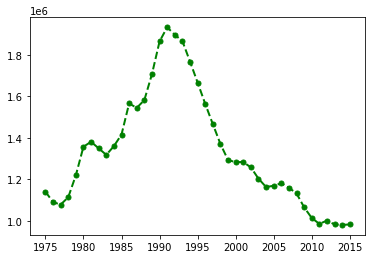

In [47]:
ogi_data['Total_crimes'] = ogi_data['report_year']+ ogi_data['violent_crimes']+ ogi_data['homicides']+ ogi_data['rapes'] + ogi_data['assaults'] + ogi_data['robberies']
crimes_by_years = ogi_data.groupby("report_year")[['Total_crimes']].sum()
#crimes_by_years.info()
plt.plot(crimes_by_years,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=5,)

 
The plot above clearly shows that the crime rates in America have increased from the year 1980 to the year 1990. Post that from the year 1995 crime rates have reduced and from the year 2011 it becomes almost stable.

In the below table the details of the highest 10 years where crime reported were high are shown.


In [33]:
ogi_data.nlargest(10,['Total_crimes']) 

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,Total_crimes
1076,1990,NY03030,"New York City, NY",7322564.0,174542.0,2245.0,3126.0,68891.0,100280.0,12.0,2383.62,30.66,42.69,940.80,1369.47,351074.0
1145,1991,NY03030,"New York City, NY",7350023.0,170390.0,2154.0,2892.0,66832.0,98512.0,12.0,2318.22,29.31,39.35,909.28,1340.30,342771.0
1007,1989,NY03030,"New York City, NY",7369454.0,169487.0,1905.0,3254.0,70951.0,93377.0,12.0,2299.86,25.85,44.16,962.77,1267.08,340963.0
938,1988,NY03030,"New York City, NY",7346352.0,162916.0,1896.0,3412.0,71030.0,86578.0,12.0,2217.64,25.81,46.44,966.87,1178.52,327820.0
1214,1992,NY03030,"New York City, NY",7375097.0,159578.0,1995.0,2815.0,63529.0,91239.0,12.0,2163.74,27.05,38.17,861.40,1237.12,321148.0
455,1981,NY03030,"New York City, NY",7070429.0,156946.0,1826.0,3862.0,43783.0,107475.0,12.0,2219.75,25.83,54.62,619.24,1520.06,315873.0
1283,1993,NY03030,"New York City, NY",7347257.0,153543.0,1946.0,2818.0,62778.0,86001.0,12.0,2089.80,26.49,38.35,854.44,1170.52,309079.0
386,1980,NY03030,"New York City, NY",7035348.0,149549.0,1812.0,3711.0,43476.0,100550.0,12.0,2125.68,25.76,52.75,617.97,1429.21,301078.0
869,1987,NY03030,"New York City, NY",7284319.0,148313.0,1672.0,3507.0,64244.0,78890.0,12.0,2036.06,22.95,48.14,881.95,1083.01,298613.0
524,1982,NY03030,"New York City, NY",7096559.0,143943.0,1668.0,3547.0,42784.0,95944.0,12.0,2028.35,23.50,49.98,602.88,1351.98,289868.0


 
# 4) Sort

I want to further analyze the years in which the highest crimes were reported. For that, I have created a new dataframe that contains the highest 10 crime-reported years data.


In [70]:
Top_10_years = ogi_data[['report_year','Total_crimes','agency_jurisdiction','months_reported','population']].sort_values('Total_crimes', ascending=True).nlargest(10, 'Total_crimes')
print(type(Top_10_years))
Top_10_years

<class 'pandas.core.frame.DataFrame'>


,report_year,Total_crimes,agency_jurisdiction,months_reported,population
1076,1990,351074.0,"New York City, NY",12.0,7322564.0
1145,1991,342771.0,"New York City, NY",12.0,7350023.0
1007,1989,340963.0,"New York City, NY",12.0,7369454.0
938,1988,327820.0,"New York City, NY",12.0,7346352.0
1214,1992,321148.0,"New York City, NY",12.0,7375097.0
455,1981,315873.0,"New York City, NY",12.0,7070429.0
1283,1993,309079.0,"New York City, NY",12.0,7347257.0
386,1980,301078.0,"New York City, NY",12.0,7035348.0
869,1987,298613.0,"New York City, NY",12.0,7284319.0
524,1982,289868.0,"New York City, NY",12.0,7096559.0


 
I have created a new dataframe named **Top_10_years**, which has information for the years of crime, total crimes that took place on these years, the place where the crimes took place, the month when these reports were captured and the population of these places. I have **sorted** the df on year and have captured the Top 10 records of year when the maximum crime was recorded.


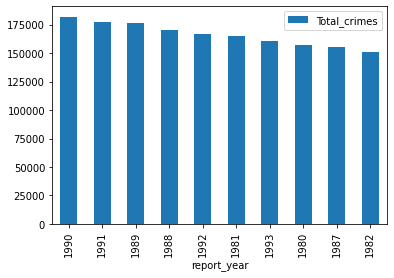

In [57]:
Top_10_years.plot(x="report_year", y="Total_crimes", kind="bar",)

 
From the above plot, it is observed that the year 1990, 1991,1989, 1988, 1992, 1981, 1993, 1980, 1987, and 1982 have reported maximum crimes when we add all the crimes and get the total. The year 1990 has observed maximum crimes of 351074 reported cases and all these crimes took place in $New York City$ itself.


 
# 5) Series

As the year 1990 has reported maximum crimes I want to explore more on, for this particular year, which types of crimes were high and what was the duration. 


In [53]:
Highest_crime_year = [1990]
Crimes_in_1990 = ogi_data[ogi_data.report_year.isin(Highest_crime_year)]
Crimes_in_1990.head(5)


,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,Total_crimes
1035,1990,NM00101,"Albuquerque, NM",384736.0,5121.0,34.0,222.0,3835.0,1030.0,12.0,1331.04,8.84,57.70,996.79,267.72,12232.0
1036,1990,TX22001,"Arlington, TX",261721.0,1876.0,8.0,139.0,1143.0,586.0,12.0,716.79,3.06,53.11,436.72,223.90,5742.0
1037,1990,GAAPD00,"Atlanta, GA",394017.0,16097.0,231.0,695.0,9062.0,6109.0,12.0,4085.36,58.63,176.39,2299.90,1550.44,34184.0
1038,1990,CO00101,"Aurora, CO",222103.0,3191.0,8.0,170.0,2616.0,397.0,12.0,1436.72,3.60,76.54,1177.83,178.75,8372.0
1039,1990,TX22701,"Austin, TX",465622.0,3326.0,46.0,280.0,1539.0,1461.0,12.0,714.31,9.88,60.13,330.53,313.77,8642.0


 
To create filter criteria for the year 1990, I have created a new dataframe above **Crimes_in_1990**. This dataset will have information on all the subtypes of crimes that occurred in the year 1990 only.

Using this dataframe I have created one more dataframe **details_crime_1990**, with only the column of sub crimes, months reported, and jurisdiction.


In [87]:
details_crime_1990 = pd.DataFrame(Crimes_in_1990, columns = ['agency_jurisdiction','report_year','violent_crimes','homicides',
                                         'rapes','assaults','robberies','population','Total_crimes'])
details_crime_1990.head(3)

,agency_jurisdiction,report_year,violent_crimes,homicides,rapes,assaults,robberies,population,Total_crimes
1035,"Albuquerque, NM",1990,5121.0,34.0,222.0,3835.0,1030.0,384736.0,12232.0
1036,"Arlington, TX",1990,1876.0,8.0,139.0,1143.0,586.0,261721.0,5742.0
1037,"Atlanta, GA",1990,16097.0,231.0,695.0,9062.0,6109.0,394017.0,34184.0


count        67.000000
mean      27839.820896
std       49145.127402
min        3794.000000
25%       10304.000000
50%       15762.000000
75%       25691.000000
max      351074.000000
Name: Total_crimes, dtype: float64


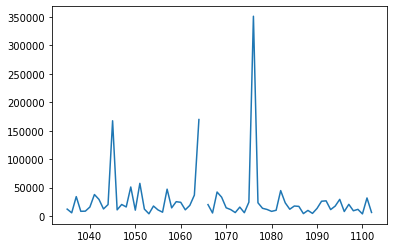

In [141]:
Total_crimes_series = pd.Series(details_crime_1990.Total_crimes)
print(Total_crimes_series.describe())
Total_crimes_series.plot()

 
In the year 1990, when maximum crimes took place. The average crime in the year 1990, was **27839** reported cases. With the **maximum of 351074** and a minimum of **3794** reported cases.




count    6.700000e+01
mean     7.547431e+05
std      9.759849e+05
min      1.599360e+05
25%      3.696220e+05
50%      4.969380e+05
75%      7.635390e+05
max      7.322564e+06
Name: population, dtype: float64


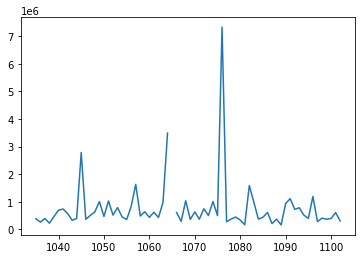

In [142]:
population_to_crime = pd.Series(details_crime_1990.population)
print(population_to_crime.describe())
population_to_crime.plot()

 
In the year 1990, from the above plot we can see that, where there is **higher population, higher the crime reported**. As we can see near index 1045 and 1075 there is a peak in Total crimes which exactly matched with the population around those values.


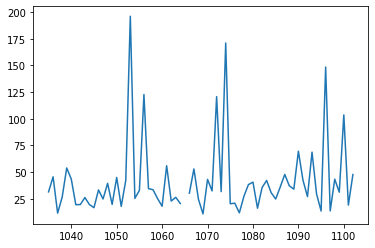

In [134]:
percent_crimes = (population_to_crime / Total_crimes_series)
percent_crimes.plot()

 
From plotting the above series of ratios of Total_crimes to Population, it is observed that around the index values 1052-55, 1072-75, and 1095-1100 the ratio is high. **This indicated its not only population to crimes hight, but there are other factors as well.**


count      67.000000
mean      545.388060
std       608.734902
min        63.000000
25%       268.000000
50%       384.000000
75%       540.000000
max      3607.000000
Name: rapes, dtype: float64


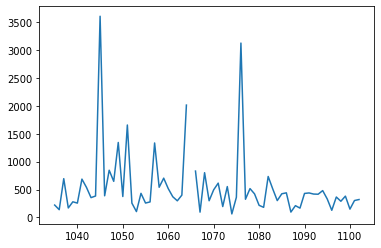

In [146]:
rape_to_crime = pd.Series(details_crime_1990.rapes)
print(rape_to_crime.describe())
rape_to_crime.plot()

 
In the year 1990, the maximum reported rape cases were 3607 and minimum cases were 63, whereas the average reported cases were 545. The plot shows matching trends with the Total_crime plotted data.


count       68.000000
mean       519.176471
std       2838.577345
min          8.000000
25%         34.000000
50%         73.500000
75%        176.250000
max      23438.000000
Name: homicides, dtype: float64


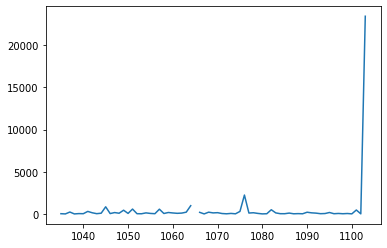

In [147]:
homicide_to_crime = pd.Series(details_crime_1990.homicides)
print(homicide_to_crime.describe())
homicide_to_crime.plot()

 
In the year 1990, the maximum reported homicides cases were 23438 and the minimum cases were 8, whereas the average reported cases were 519. The plot does not show any matching trends with the Total_crime plotted data.


count        67.000000
mean       5944.358209
std       13368.969161
min         275.000000
25%        1389.500000
50%        2695.000000
75%        4812.500000
max      100280.000000
Name: robberies, dtype: float64


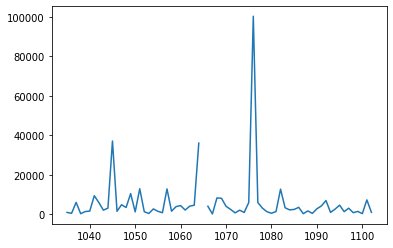

In [148]:
robberies_to_crime = pd.Series(details_crime_1990.robberies)
print(robberies_to_crime.describe())
robberies_to_crime.plot()

 
In the year 1990, the maximum reported robberies cases were 100280 and minimum cases were 275, whereas the average reported cases were 5944. The plot shows matching trends with the Total_crime plotted data.


count       67.000000
mean      6258.059701
std      10639.006988
min        313.000000
25%       2090.000000
50%       3440.000000
75%       6710.500000
max      68891.000000
Name: assaults, dtype: float64


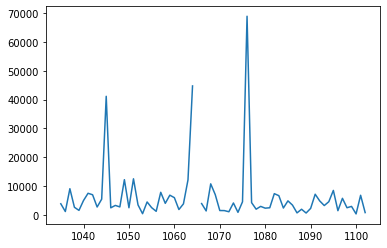

In [150]:

assaults_to_crime = pd.Series(details_crime_1990.assaults)
print(assaults_to_crime.describe())
assaults_to_crime.plot()

 
In the year 1990, the maximum reported assaults cases were 68891 and minimum cases were 313, whereas the average reported cases were 6258. The plot shows matching trends with the Total_crime plotted data.

After looking at all data, apart from homicides crime cases rest of the sub-crimes show almost the same trend towards the total_crime cases.


# 6) Plot

 
The below plots shows the most unsafe and safe area during the year 1990 when maximum crimes took place.


In [82]:
Unsafe_area_1990 = details_crime_1990[['agency_jurisdiction','Total_crimes']].sort_values('Total_crimes',ascending=False).head(10)
#print(Unsafe_area_1990)
safe_area_1990 = details_crime_1990[['agency_jurisdiction','Total_crimes']].sort_values('Total_crimes',ascending=False).tail(10)
#safe_area_1990

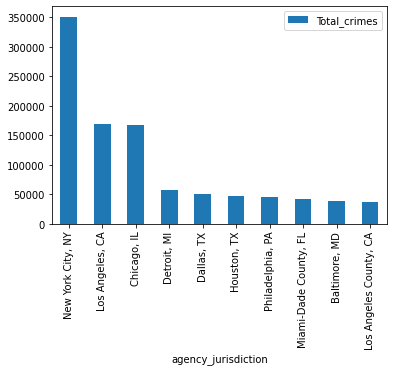

In [90]:
Unsafe_area_1990.plot(x="agency_jurisdiction", y="Total_crimes", kind="bar")

 
Most unsafe areas of 1990 - From the plots above, we can see that the most crimes took place in **New York** which is the highest and double in numbers compared to crimes in the rest of the areas. Like **LA and Chicago** also has max crimes but almost half of the number of crimes than NY. Post that the rest of the other areas have almost the same number of crimes that occurred in the year 1990.


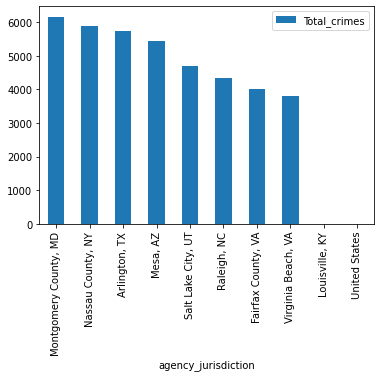

In [89]:
safe_area_1990.plot(x="agency_jurisdiction", y="Total_crimes", kind="bar")

 
Comparatively Safe areas of 1990 - From the above plot, we can see that the **Virginia Beach** has reported the least number of crime cases. Similarly, other areas like **Fairfax County, Raleigh, Salt lake city, Mesa, Arlington** have reported little higher crimes but very less than NY, which is the topmost crime areas of the year 1990.


In [86]:
sub_crimes_total = details_crime_1990.groupby("report_year")['violent_crimes','homicides','rapes','assaults','robberies'].sum()
sub_crimes_total.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,violent_crimes,homicides,rapes,assaults,robberies
report_year,,,,,
1990,2686096.0,35304.0,36541.0,419290.0,398272.0


 
The summary count of all the sub-crimes which took place in the year 1990 is shown in the above code. The detailed pictorial representation is as below.


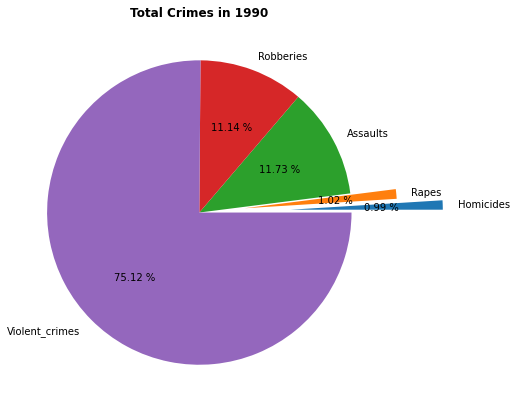

In [128]:
#prints the sums of all crimes for year 1990
T_homi = Crimes_in_1990.homicides.sum()
T_rapes = Crimes_in_1990.rapes.sum()
T_assaults = Crimes_in_1990.assaults.sum()
T_robberies = Crimes_in_1990.robberies.sum()
T_violent = Crimes_in_1990.violent_crimes.sum()

#code for size of plot
plt.figure(figsize=(12,7))

#labelling for plot
label = ['Homicides','Rapes','Assaults','Robberies','Violent_crimes']
explode = [0.6,0.3,0,0,0]

#code for pieplot
plt.pie([T_homi,T_rapes,T_assaults,T_robberies,T_violent], labels=label, autopct='%.2f %%', explode=explode)
plt.title('Total Crimes in 1990', fontweight='bold')
plt.show()

 
# 7) Summary

- The crimes were on the increasing trend at the start of the dataset and reached their highest at the year 1090.
- Post year 1991 the crime rates have started dropping and towards the end of the year 2015, it was flat.
- NY city is the highest reported crimes area and also with the highest population.
- In the year 1990 highest crimes were observed in Violent crimes to about 75.12%, followed by 11.73% Assaults, 11.14% Robberies, 1.02% Rapes, and 0.99% Homicides.


# 8) Recommendations

From overall observations, the NY city does have higher crimes as its one of the populated areas. More attention can be given to these areas with the new technical support as the maximum crimes are related to violence. Some major steps were taken during the year 1991 which helped to reduce crime rates drastically if we get more details what has chanced from the year 1990 to 1991 can also help to plan next steps now.
